In [1]:
# best 3 solutions based on EXP1 in turns of f1 micro is:
# XGBcls: RoadNet+Social type, 0.6561797753
# BAGcls: RoadNet+Social type, 0.6539325843
# RFreg: RoadNet+Social total, 0.6494382022
# with ~2014, min-max, no feature selection

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
from src.experiment_based_function import SEEDS

In [3]:
f1_choices = ['test_f1_weighted', 'test_f1_macro', 'test_f1_micro']

In [4]:
def get_paper_table(means, f1_type, key_cols):
    cols_name_convert = {'RoadNet': 'RoadNet', 'RoadNet+Segment_NO_TOTAL_~2014': 'RoadNet+Segment type',
     'RoadNet+Segment_TOTAL_~2014': 'RoadNet+Segment total', 'Segment_NO_TOTAL_~2014': 'Segment type',
     'Segment_TOTAL_~2014': 'Segment total'}
    means_for_pivot = means.reset_index()
    means_for_pivot['key'] = means_for_pivot.apply(lambda x: tuple([x[col] for col in key_cols]), axis=1)
    table = means_for_pivot.reset_index().pivot(index='key', columns='ftr_combo_name', values=f1_type)
    table.index = pd.MultiIndex.from_tuples(table.index, names=key_cols)    
    table.columns.name = f1_type
    table.columns = [cols_name_convert[col] for col in table.columns]
    return table[['RoadNet', 'Segment total', 'Segment type', 'RoadNet+Segment total', 'RoadNet+Segment type']]

# Upsample result

In [20]:
from zipfile import ZipFile
import re
from pandas.compat import StringIO

In [41]:
def get_up_result(eval_or_grid):
    res = []
    has_res_cnt = {'regular':0, 'svm':0}
    with ZipFile('experiment_1001/exp3+RFreg-res.zip') as myzip:
        for smote_kind in ['regular', 'svm']:
            for seed in SEEDS:
                smote_path = 'exp3/seed_%d/upsample_smote_%s' % (seed, smote_kind)
                fn = '%s/%s_res.csv' % (smote_path, eval_or_grid)
                try:
                    df = pd.read_csv(StringIO(myzip.read(fn).decode('utf-8')), index_col=0)
                    df['seed'] = seed
                    df['smote_kind'] = smote_kind
                    has_res_cnt[smote_kind]+=1
                    res.append(df)

                except KeyError:
                    print('no %s_res in' % eval_or_grid, smote_path)

    res = pd.concat(res, ignore_index=True)
    print(has_res_cnt)
    return res

In [44]:
keys = ['smote_kind', 'model_name', 'feature_selection', 'ftr_combo_name']

In [43]:
up_eval_res = get_up_result('eval')

no eval_res in exp3/seed_972/upsample_smote_regular
no eval_res in exp3/seed_7821/upsample_smote_regular
no eval_res in exp3/seed_57852/upsample_smote_regular
no eval_res in exp3/seed_168352/upsample_smote_regular
no eval_res in exp3/seed_789729423/upsample_smote_regular
no eval_res in exp3/seed_972/upsample_smote_svm
no eval_res in exp3/seed_7821/upsample_smote_svm
no eval_res in exp3/seed_57852/upsample_smote_svm
no eval_res in exp3/seed_168352/upsample_smote_svm
no eval_res in exp3/seed_789729423/upsample_smote_svm
{'regular': 5, 'svm': 5}


In [10]:
# up_eval_res[['up_y_dist', 'y_dist']].iloc[::-1]

In [45]:
up_means = up_eval_res.groupby(keys).mean()[f1_choices]
up_stds = up_eval_res.groupby(keys).std()[f1_choices]

f1_type = test_f1_micro


test_f1_micro
smote_kind model_name feature_selection ftr_combo_name                               
regular    XGBcls     mrmr              RoadNet+Segment_NO_TOTAL_~2014       0.662921
                      None              RoadNet+Segment_NO_TOTAL_~2014       0.662921
svm        RFreg      mrmr              RoadNet+Segment_TOTAL_~2014          0.660674
                      None              RoadNet+Segment_TOTAL_~2014          0.660674
           XGBcls     None              RoadNet+Segment_NO_TOTAL_~2014       0.653933

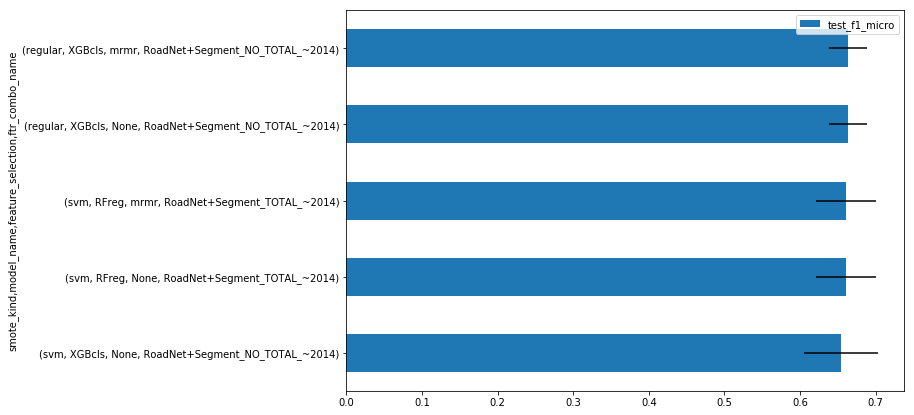

In [46]:
f1_type = f1_choices[2]
print('f1_type =', f1_type)

up_means_to_plot = up_means[[f1_type]].sort_values(f1_type, ascending=True)
up_stds_to_plot = up_stds[[f1_type]]

table_top_n = 5
plot_top_n = 5
up_means_to_plot.iloc[-plot_top_n:].plot(kind='barh', figsize=(10,7), xerr=up_stds_to_plot)
up_means_to_plot.iloc[:-(table_top_n+1):-1,:]

In [65]:
f1_type = f1_choices[2]
print('f1_type =', f1_type)

key_cols = ['model_name', 'feature_selection', 'smote_kind']
table = get_paper_table(up_means, f1_type, key_cols)
table.to_csv('deliverables/experiment_1001/EXP3 upsampling table %s.csv' % f1_type, encoding='utf8')
table

f1_type = test_f1_micro


RoadNet  Segment total  \
model_name feature_selection smote_kind                            
BAGcls     None              regular     0.649438       0.496629   
                             svm         0.633708       0.505618   
           mrmr              regular     0.649438       0.480899   
                             svm         0.633708       0.523596   
           rfecv_linsvc      regular     0.622472       0.447191   
                             svm         0.644944       0.474157   
GDBcls     None              regular     0.617978       0.523596   
                             svm         0.629213       0.521348   
           mrmr              regular     0.617978       0.503371   
                             svm         0.629213       0.525843   
           rfecv_linsvc      regular     0.620225       0.458427   
                             svm         0.638202       0.507865   
RFreg      None              regular     0.595506       0.494382   
                             svm         0.615730       0.525843   
           mrmr              regular     0.595506       0.532584   
                             svm         0.615730       0.541573   
           rfecv_linsvc      regular     0.604494       0.501124   
                             svm         0.615730       0.521348   
XGBcls     None              regular     0.600000       0.519101   
                             svm         0.593258       0.521348   
           mrmr              regular     0.600000       0.498876   
                             svm         0.593258       0.510112   
           rfecv_linsvc      regular     0.602247       0.487640   
                             svm         0.608989       0.507865   

                                         Segment type  RoadNet+Segment total  \
model_name feature_selection smote_kind                                        
BAGcls     None              regular         0.613483               0.629213   
                             svm             0.611236               0.633708   
           mrmr              regular         0.613483               0.633708   
                             svm             0.604494               0.633708   
           rfecv_linsvc      regular         0.595506               0.635955   
                             svm             0.604494               0.617978   
GDBcls     None              regular         0.629213               0.615730   
                             svm             0.633708               0.624719   
           mrmr              regular         0.622472               0.622472   
                             svm             0.629213               0.624719   
           rfecv_linsvc      regular         0.608989               0.626966   
                             svm             0.613483               0.629213   
RFreg      None              regular         0.528090               0.644944   
                             svm             0.573034               0.660674   
           mrmr              regular         0.530337               0.651685   
                             svm             0.575281               0.660674   
           rfecv_linsvc      regular         0.566292               0.642697   
                             svm             0.582022               0.649438   
XGBcls     None              regular         0.608989               0.631461   
                             svm             0.617978               0.631461   
           mrmr              regular         0.615730               0.626966   
                             svm             0.631461               0.631461   
           rfecv_linsvc      regular         0.606742               0.633708   
                             svm             0.582022               0.608989   

                                         RoadNet+Segment type  
model_name feature_selection smote_kind                        
BAGcls     None              regular                 0.644944  


In [ ]:
on_train_grid_res = get_up_result('upsample_smote', 'grid')

In [ ]:
on_train_grid_res[on_train_grid_res['kind']=='cls'].groupby(keys).mean()[['mean_test']]

# downsample result

In [22]:
from csl_exp3_down_1001 import DOWN_SEEDS

In [57]:
def get_down_result(eval_or_grid):
    res = []
    has_res_cnt = 0
    with ZipFile('experiment_1001/exp3+RFreg-res.zip') as myzip:
        for seed in SEEDS:
            smote_path = 'exp3/seed_%d/downsample' % (seed)
            fn = '%s/%s_res.csv' % (smote_path, eval_or_grid)
            try:
                df = pd.read_csv(StringIO(myzip.read(fn).decode('utf-8')), index_col=0)
                df['seed'] = seed
                has_res_cnt+=1
                res.append(df)

            except KeyError:
                print('no %s_res in' % eval_or_grid, smote_path)

    res = pd.concat(res, ignore_index=True)
    print(has_res_cnt)
    return res

In [26]:
def get_down_result(eval_or_grid):
    res = []

    has_res_cnt = 0
    for seed in SEEDS:
        exp_path = 'experiment_1001/exp3/seed_%d' % seed
        smote_path = '%s/downsample' % (exp_path)

        try:
            df = pd.read_csv('%s/%s_res.csv' % (smote_path, eval_or_grid), index_col=0)
            df['seed'] = seed
            has_res_cnt+=1
            res.append(df)
        except FileNotFoundError:
            print('no %s_res in' % eval_or_grid, smote_path)

    res = pd.concat(res, ignore_index=True)
    print(has_res_cnt)

    return res

In [58]:
down_res = get_down_result('eval')

no eval_res in exp3/seed_57852/downsample
no eval_res in exp3/seed_168352/downsample
no eval_res in exp3/seed_291592/downsample
no eval_res in exp3/seed_789729423/downsample
6


In [59]:
down_keys = ['model_name', 'feature_selection', 'ftr_combo_name']

In [60]:
down_means = down_res.groupby(down_keys).mean()[f1_choices]
down_stds = down_res.groupby(down_keys).std()[f1_choices]

In [17]:
# down_res.groupby(down_keys).count()[f1_choices]

f1_type = test_f1_weighted


test_f1_weighted
model_name feature_selection ftr_combo_name                               
RFreg      None              RoadNet+Segment_TOTAL_~2014          0.411583
           mrmr              RoadNet+Segment_TOTAL_~2014          0.411583

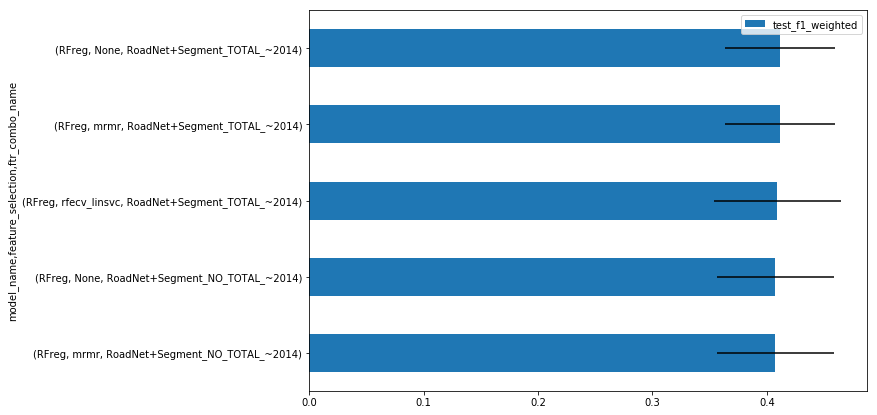

In [61]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)

down_means_to_plot = down_means[[f1_type]].sort_values(f1_type, ascending=True)
down_stds_to_plot = down_stds[[f1_type]]

down_means_to_plot.iloc[-5:].plot(kind='barh', figsize=(10,7), xerr=down_stds_to_plot)
down_means_to_plot.iloc[:-3:-1,:]

In [66]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)
key_cols = ['model_name', 'feature_selection']
table = get_paper_table(down_means, f1_type, key_cols)
table.to_csv('deliverables/experiment_1001/EXP3 downsampling table %s.csv' % f1_type, encoding='utf8')

f1_type = test_f1_weighted
